In [2]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error, r2_score

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### Load Data

In [39]:
# Load training and testing datasets
train_data = pd.read_csv("/content/drive/MyDrive/CS 229 Group Project/Data/Final/train_data_full.csv")  # Training data
test_data = pd.read_csv("/content/drive/MyDrive/CS 229 Group Project/Data/Final/test_data_full.csv")    # Testing data

In [ ]:
train_data.head()

,user_id,parent_asin,rating,user_average_rating,user_std_rating,avg_user_sentiment_title,avg_user_sentiment_text,user_review_count,helpfulness_ratio,average_rating,rating_number,title_word_count,weighted_rating,description_sentiment
0,AE7TRB63EXFI75JPBDPDJGEDB3DQ,B07BM9GWG7,5.0,5.000000,0.00000,0.325000,0.230556,2,2.0,4.3,18580,12,42.268548,0.31511
1,AE7WW5XV67RU3WK4CFEEHYQKNUCA,B07BM9GWG7,5.0,5.000000,0.00000,0.000000,0.100000,2,0.0,4.3,18580,12,42.268548,0.31511
2,AEA3WEZRV4DZY4E6B23F3O3TRPPQ,B07BM9GWG7,5.0,5.000000,0.00000,0.304688,0.187500,2,0.0,4.3,18580,12,42.268548,0.31511
3,AEDO3AZZX36V2CZWATGIT6NZOOAQ,B07BM9GWG7,3.0,2.666667,0.57735,0.000000,-0.006667,3,0.0,4.3,18580,12,42.268548,0.31511
4,AEL76KTAYK2K7OZVO6YUGS6NKDKQ,B07BM9GWG7,5.0,5.000000,0.00000,0.666667,0.216696,3,0.0,4.3,18580,12,42.268548,0.31511


In [ ]:
test_data.head()

,user_id,parent_asin,rating,user_average_rating,user_std_rating,avg_user_sentiment_title,avg_user_sentiment_text,user_review_count,helpfulness_ratio,average_rating,rating_number,title_word_count,weighted_rating,description_sentiment
0,AG6NU7BPQU7NCIORNPQCZSGPT2NQ,B0050HW9PW,5.0,5.0,0.000000,0.495833,0.181966,3,19.666667,4.4,7558,5,39.294174,0.0
1,AG73LWM6X7M2XB5ATVENQKBPVPOQ,B0050HW9PW,1.0,1.0,0.000000,0.033333,0.058796,3,4.333333,4.4,7558,5,39.294174,0.0
2,AFE2WBMQALF7RBL6J34OPNCYJTWA,B008R5LW5W,4.0,4.0,0.000000,0.600000,0.486667,3,0.333333,4.6,7308,10,40.925564,0.0
3,AGPZDOLQJSGI4ZVB7XZK356C5DCA,B008R5LW5W,1.0,3.0,2.828427,0.000000,0.400000,2,0.000000,4.6,7308,10,40.925564,0.0
4,AEPXRCQYFZB6CJUUSR5RPVZ3FSVA,B01412X46Y,4.0,4.0,0.000000,0.700000,0.189583,3,0.000000,4.2,6956,5,37.159515,0.5


In [40]:
# normalize
columns_to_normalize = [
    'rating', 'user_average_rating', 'user_std_rating', 'avg_user_sentiment_title',
    'avg_user_sentiment_text', 'user_review_count', 'helpfulness_ratio',
    'average_rating', 'rating_number', 'title_word_count',
    'weighted_rating', 'description_sentiment'
]

scaler = MinMaxScaler()

train_data[columns_to_normalize] = scaler.fit_transform(train_data[columns_to_normalize])
test_data[columns_to_normalize] = scaler.transform(test_data[columns_to_normalize])

In [41]:
X_train = train_data.drop(['rating', 'user_id', 'parent_asin'], axis=1)
y_train = train_data['rating']

X_test = test_data.drop(['rating', 'user_id', 'parent_asin'], axis=1)
y_test = test_data['rating']

In [42]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': linear_reg.coef_,
    'Absolute_Coefficient': np.abs(linear_reg.coef_)
}).sort_values(by='Absolute_Coefficient', ascending=False)

print(feature_importance)

                     Feature  Coefficient  Absolute_Coefficient
9            weighted_rating    -0.947832              0.947832
0        user_average_rating     0.883135              0.883135
6             average_rating     0.813649              0.813649
7              rating_number     0.623729              0.623729
5          helpfulness_ratio     0.151003              0.151003
3    avg_user_sentiment_text     0.144675              0.144675
4          user_review_count    -0.128638              0.128638
8           title_word_count     0.058590              0.058590
2   avg_user_sentiment_title     0.046406              0.046406
10     description_sentiment     0.024387              0.024387
1            user_std_rating     0.015895              0.015895


### Linear Regression, KNN

In [43]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_reg.predict(X_test)

# Evaluate Linear Regression
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print(f"\nLinear Regression RMSE: {rmse_linear:.4f}")


Linear Regression RMSE: 0.1949


In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_reg = KNeighborsRegressor(n_neighbors=5)  # Default k=5
knn_reg.fit(X_train_scaled, y_train)

y_pred_knn = knn_reg.predict(X_test_scaled)

rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print(f"\nKNN Regressor RMSE: {rmse_knn:.4f}")


KNN Regressor RMSE: 0.1925


Hyperparameter tuning for KNN

In [45]:
param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsRegressor()

grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_parameters = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)

print(f"Best Parameters: {best_parameters}")
print(f"Best RMSE: {best_rmse:.4f}")

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'uniform'}
Best RMSE: 0.2316


In [46]:
best_knn = KNeighborsRegressor(n_neighbors=20, weights='uniform', metric='manhattan')
best_knn.fit(X_train_scaled, y_train)
y_pred_best = best_knn.predict(X_test_scaled)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
print(f"Best Grid Search KNN RMSE on Test Set: {rmse_best:.4f}")

Best Grid Search KNN RMSE on Test Set: 0.1859


##### Evaluating influence of features on above models



In [47]:
feature_importance = {}

for feature in X_train.columns:
    X_train_reduced = X_train.drop(columns=[feature])
    X_test_reduced = X_test.drop(columns=[feature])
    linear_reg_reduced = LinearRegression()
    linear_reg_reduced.fit(X_train_reduced, y_train)
    y_pred_reduced = linear_reg_reduced.predict(X_test_reduced)
    rmse_reduced = np.sqrt(mean_squared_error(y_test, y_pred_reduced))
    rmse_difference = rmse_reduced - baseline_rmse
    feature_importance[feature] = rmse_difference

feature_importance_df = pd.DataFrame({
    'Feature': feature_importance.keys(),
    'RMSE_Change': feature_importance.values()
}).sort_values(by='RMSE_Change', ascending=False)

print(feature_importance_df)

# Plot Feature Importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['RMSE_Change'], color='coral')
plt.xlabel('Change in RMSE')
plt.ylabel('Feature')
plt.title('Feature Importance (Linear Regression)')
plt.gca().invert_yaxis()
plt.show()

NameError: name 'baseline_rmse' is not defined

In [ ]:
feature_importance = {}

for feature in X_train.columns:
    X_train_reduced = X_train.drop(columns=[feature])
    X_test_reduced = X_test.drop(columns=[feature])
    knn_reduced = KNeighborsRegressor(n_neighbors=5)
    knn_reduced.fit(X_train_reduced, y_train)
    y_pred_reduced = knn_reduced.predict(X_test_reduced)
    rmse_reduced = np.sqrt(mean_squared_error(y_test, y_pred_reduced))
    rmse_difference = rmse_reduced - baseline_rmse
    feature_importance[feature] = rmse_difference
feature_importance_df = pd.DataFrame({
    'Feature': feature_importance.keys(),
    'RMSE_Change': feature_importance.values()
}).sort_values(by='RMSE_Change', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['RMSE_Change'], color='lightgreen')
plt.xlabel('Change in RMSE')
plt.ylabel('Feature')
plt.title('Feature Importance (KNN)')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
feature_importance_df = feature_importance_df.sort_values(by='RMSE_Change', ascending=False)

plt.figure(figsize=(12, 6))
plt.plot(feature_importance_df['Feature'], feature_importance_df['RMSE_Change'], marker='o', linestyle='-', label="Feature Set")
plt.title('Feature Importance\nError Rate Change by Feature', fontsize=16, weight='bold')
plt.xlabel('Feature Sets', fontsize=12)
plt.ylabel('RMSE Change', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend()
plt.tight_layout()
plt.show()

##  Filtering


##### Content Based Filtering

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

user_features_cb = train_data[['user_average_rating', 'user_std_rating', 'avg_user_sentiment_title',
                               'avg_user_sentiment_text', 'user_review_count', 'helpfulness_ratio']]
product_features_cb = train_data[['average_rating', 'rating_number', 'title_word_count',
                                  'description_sentiment']]

X_cb = pd.concat([user_features_cb, product_features_cb], axis=1)
y_cb = train_data['rating']

scaler = StandardScaler()
X_cb_scaled = scaler.fit_transform(X_cb)

content_model_cb = LinearRegression()
content_model_cb.fit(X_cb_scaled, y_cb)

test_user_features = test_data[['user_average_rating', 'user_std_rating', 'avg_user_sentiment_title',
                                'avg_user_sentiment_text', 'user_review_count', 'helpfulness_ratio']]
test_product_features = test_data[['average_rating', 'rating_number', 'title_word_count', 'description_sentiment']]
test_features = pd.concat([test_user_features, test_product_features], axis=1)
test_features_scaled = scaler.transform(test_features)

# Predict Ratings Using CB
cb_test_predictions = content_model_cb.predict(test_features_scaled)

rmse_cb = np.sqrt(mean_squared_error(test_data['rating'], cb_test_predictions))
print(f"Content-Based Filtering RMSE: {rmse_cb}")


##### Collaborative base filtering

In [ ]:
# User-Item Interaction Matrix
interaction_matrix = train_data.pivot(index='user_id', columns='parent_asin', values='rating').fillna(0)

# Collaborative Filtering (SVD)
def collaborative_filtering(ratings_matrix, n_components=10):
    svd = TruncatedSVD(n_components=n_components, random_state=42)
    user_embeddings = svd.fit_transform(ratings_matrix)
    product_embeddings = svd.components_.T
    reconstructed_matrix = np.dot(user_embeddings, product_embeddings.T)
    return reconstructed_matrix, user_embeddings, product_embeddings

cf_predictions, user_embeddings, product_embeddings = collaborative_filtering(interaction_matrix.values)

def collaborative_predict(user_id, product_id, user_index_map, product_index_map, cf_preds):
    try:
        user_idx = user_index_map[user_id]
        product_idx = product_index_map[product_id]
        return cf_preds[user_idx, product_idx]
    except KeyError:
        return None  # Handle unknown users/products

# Create mappings for user and product indices
user_index_map = {user: idx for idx, user in enumerate(interaction_matrix.index)}
product_index_map = {product: idx for idx, product in enumerate(interaction_matrix.columns)}

cf_test_predictions = []
for _, row in test_data.iterrows():
    pred = collaborative_predict(
        user_id=row['user_id'],
        product_id=row['parent_asin'],
        user_index_map=user_index_map,
        product_index_map=product_index_map,
        cf_preds=cf_predictions
    )
    cf_test_predictions.append(pred if pred is not None else global_user_mean)

rmse_cf = np.sqrt(mean_squared_error(test_data['rating'], cf_test_predictions))
print(f"Collaborative Filtering RMSE: {rmse_cf}")

##### Hybrid Model

In [ ]:
interaction_matrix = train_data.pivot(index='user_id', columns='parent_asin', values='rating').fillna(0)

# Collaborative Filtering (SVD)
def collaborative_filtering(ratings_matrix, n_components=10):
    svd = TruncatedSVD(n_components=n_components, random_state=42)
    user_embeddings = svd.fit_transform(ratings_matrix)
    product_embeddings = svd.components_.T
    reconstructed_matrix = np.dot(user_embeddings, product_embeddings.T)
    return reconstructed_matrix

cf_predictions = collaborative_filtering(interaction_matrix.values)

user_features_cb = train_data[['user_average_rating', 'user_std_rating', 'avg_user_sentiment_title',
                               'avg_user_sentiment_text', 'user_review_count', 'helpfulness_ratio']]
product_features_cb = train_data[['average_rating', 'rating_number', 'title_word_count',
                                  'description_sentiment']]

content_features = pd.concat([user_features_cb, product_features_cb], axis=1)

scaler = StandardScaler()
normalized_content_features = scaler.fit_transform(content_features)

content_model_cb.fit(normalized_content_features, y_cb)

test_user_features_combined = test_data[['user_average_rating', 'user_std_rating', 'avg_user_sentiment_title',
                                         'avg_user_sentiment_text', 'user_review_count', 'helpfulness_ratio']]
test_product_features_combined = test_data[['average_rating', 'rating_number', 'title_word_count', 'description_sentiment']]
test_features = pd.concat([test_user_features_combined, test_product_features_combined], axis=1)
normalized_test_features = scaler.transform(test_features)

X_cb = pd.concat([user_features_cb, product_features_cb], axis=1)
y_cb = train_data['rating']

content_model_cb = LinearRegression()
content_model_cb.fit(X_cb, y_cb)

global_user_mean = user_features_cb['user_average_rating'].mean()
global_product_mean = product_features_cb['average_rating'].mean()

def hybrid_predict(user_id, product_id, user_features, product_features, cf_preds, cb_model, global_user_mean, global_product_mean):
    # Collaborative Filtering Prediction
    cf_pred = None
    if user_id in user_features.index and product_id in product_features.index:
        user_idx = user_features.index.get_loc(user_id)
        product_idx = product_features.index.get_loc(product_id)
        cf_pred = cf_preds[user_idx, product_idx]

    # Content-Based Filtering Prediction
    try:
        if user_id in user_features.index:
            user_feature_values = user_features.loc[user_id].values
        else:
            user_feature_values = [global_user_mean] * user_features.shape[1]

        if product_id in product_features.index:
            product_feature_values = product_features.loc[product_id].values
        else:
            product_feature_values = [global_product_mean] * product_features.shape[1]

        features_cb = np.concatenate([user_feature_values, product_feature_values]).reshape(1, -1)
        cb_pred = cb_model.predict(features_cb)[0]
    except KeyError:
        cb_pred = None

    if cf_pred is None and cb_pred is None:
        return (global_user_mean + global_product_mean) / 2
    elif cf_pred is None:
        return cb_pred
    elif cb_pred is None:
        return cf_pred
    else:
        return 0.6 * cf_pred + 0.4 * cb_pred


with warnings.catch_warnings():
    warnings.filterwarnings(action='ignore', category=UserWarning)

    test_predictions = []
    for _, row in test_data.iterrows():
        user_id = row['user_id']
        product_id = row['parent_asin']
        pred = hybrid_predict(
            user_id=user_id,
            product_id=product_id,
            user_features=user_features_cb,
            product_features=product_features_cb,
            cf_preds=cf_predictions,
            cb_model=content_model_cb,
            global_user_mean=global_user_mean,
            global_product_mean=global_product_mean
        )
        test_predictions.append(pred)

rmse = np.sqrt(mean_squared_error(test_data['rating'], test_predictions))
print(f"Hybrid Model RMSE: {rmse}")

## Plots!

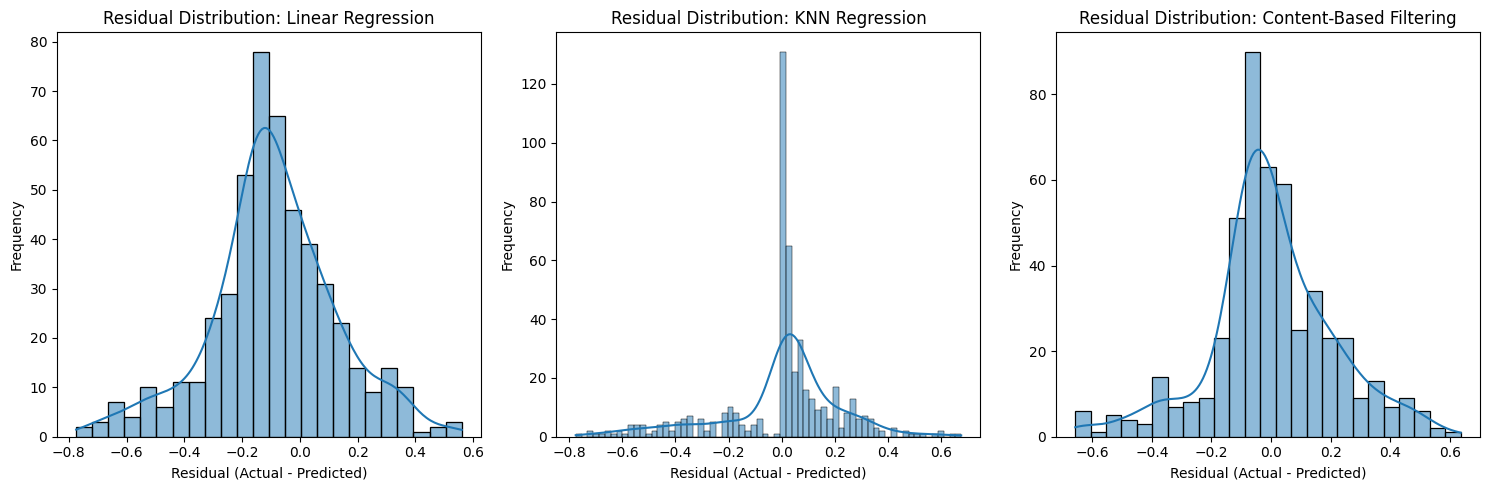

In [38]:
# Calculate residuals (differences between actual and predicted values) for each model
residuals = {
    "Linear Regression": y_test - y_pred_linear,
    "KNN Regression": y_test - y_pred_best,
    "Content-Based Filtering": y_test - cb_test_predictions,
}

# Plot histograms of residuals in one row
plt.figure(figsize=(15, 5))  # Adjust figure size for row layout
for i, (model_name, residual) in enumerate(residuals.items(), 1):
    plt.subplot(1, len(residuals), i)
    sns.histplot(residual, kde=True)
    plt.title(f"Residual Distribution: {model_name}")
    plt.xlabel("Residual (Actual - Predicted)")
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()